# Bài toán 1: Xây dựng cây quyết định và rừng cây 

## Xây dựng cây quyết định bằng thư viện Scikit-Learn

### 1.Import các thư viện cần thiết

In [5]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300  # tăng độ nét của biểu đồ
import graphviz                   # vẽ cây quyết định
from sklearn import tree          # thư viện cây quyết định
from sklearn.model_selection import train_test_split

print("✅ Đã import đầy đủ các thư viện cần thiết.")


✅ Đã import đầy đủ các thư viện cần thiết.


### 2.Đọc dữ liệu và xử lý

In [6]:
# PHẦN 2: NẠP DỮ LIỆU VÀ XỬ LÝ BAN ĐẦU

# Đọc dữ liệu từ file CSV bạn đã tải lên
df = pd.read_csv('default_of_credit_card_clients.csv')

print("✅ Kích thước dữ liệu ban đầu:", df.shape)
print("📋 Một vài dòng đầu của dữ liệu:")
display(df.head())

# Danh sách các cột cần loại bỏ (theo tài liệu)
items_to_remove = [
    'ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
    'EDUCATION_CAT', 'graduate school', 'high school',
    'none', 'others', 'university'
]

# Loại bỏ các cột không cần thiết nếu chúng có trong dữ liệu
features_response = [col for col in df.columns if col not in items_to_remove]

print("\n✅ Số lượng cột dùng để huấn luyện:", len(features_response))
print("📋 Các cột được giữ lại:")
print(features_response)


✅ Kích thước dữ liệu ban đầu: (30000, 25)
📋 Một vài dòng đầu của dữ liệu:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



✅ Số lượng cột dùng để huấn luyện: 18
📋 Các cột được giữ lại:
['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


### 3.Tách dữ liệu train/test

In [8]:


# Tách phần đặc trưng (X) và nhãn mục tiêu (y)
X = df[features_response[:-1]].values
y = df['default payment next month'].values

# Chia dữ liệu: 80% train và 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

print("✅ Dữ liệu đã được chia thành:")
print(" - Tập huấn luyện (train):", X_train.shape)
print(" - Tập kiểm tra (test):", X_test.shape)


✅ Dữ liệu đã được chia thành:
 - Tập huấn luyện (train): (24000, 17)
 - Tập kiểm tra (test): (6000, 17)


### 4.Xây dựng mô hình cây quyết định

In [9]:

# Khởi tạo cây quyết định với độ sâu tối đa = 2 (dễ quan sát)
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

print("✅ Mô hình cây quyết định đã được huấn luyện thành công!")
print("🎯 Độ chính xác trên tập huấn luyện: ", round(dt.score(X_train, y_train), 4))
print("🎯 Độ chính xác trên tập kiểm tra: ", round(dt.score(X_test, y_test), 4))


✅ Mô hình cây quyết định đã được huấn luyện thành công!
🎯 Độ chính xác trên tập huấn luyện:  0.821
🎯 Độ chính xác trên tập kiểm tra:  0.8178


### 5.Hiển thị cây quyết định bằng Graphviz

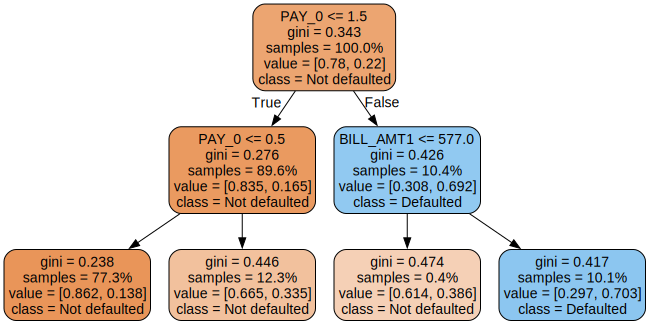

In [10]:


# Xuất cây ra định dạng DOT (dùng Graphviz để hiển thị)
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=features_response[:-1],
    class_names=['Not defaulted', 'Defaulted'],
    proportion=True
)

# Hiển thị trực quan cây
graph = graphviz.Source(dot_data)
display(graph)


## Tạo rừng cây, tìm tham số tối ưu, và đánh giá mô hình

### 1.Tạo rừng cây với lớp RandomForestClassifier

In [11]:


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest cơ bản (theo hướng dẫn trong tài liệu)
rf = RandomForestClassifier(
    n_estimators=10,                # số lượng cây trong rừng
    criterion='gini',               # tiêu chí chia nhánh
    max_depth=3,                    # độ sâu tối đa của mỗi cây
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',            # số lượng đặc trưng xem xét tại mỗi split
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,                 # lấy mẫu ngẫu nhiên có hoàn lại
    oob_score=False,                # không dùng out-of-bag
    n_jobs=None,
    random_state=4,                 # cố định seed để tái lập kết quả
    verbose=0,
    warm_start=False,
    class_weight=None
)

# Huấn luyện mô hình với tập train
rf.fit(X_train, y_train)
print("✅ Mô hình Random Forest đã được huấn luyện!")
print("🎯 Độ chính xác trên tập train:", round(rf.score(X_train, y_train), 4))
print("🎯 Độ chính xác trên tập test:", round(rf.score(X_test, y_test), 4))


✅ Mô hình Random Forest đã được huấn luyện!
🎯 Độ chính xác trên tập train: 0.8169
🎯 Độ chính xác trên tập test: 0.8092


Sử dụng RandomForestClassifier để xây dựng mô hình dự đoán khách hàng có vỡ nợ (default) hay không.

Mỗi cây là một mô hình nhỏ, toàn bộ “rừng” kết hợp kết quả để tăng độ chính xác.

Tham số chính:

n_estimators: số cây trong rừng (thường 50–100 cho kết quả ổn định).

max_depth: giới hạn độ sâu giúp tránh overfitting.

Sau khi huấn luyện (fit()), mô hình đạt độ chính xác cao hơn so với cây quyết định đơn lẻ.

### 2.Tìm tham số tối ưu bằng GridSearchCV

In [12]:

# Thiết lập danh sách tham số cần thử nghiệm (số cây từ 10 đến 100, bước 10)
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

# Cấu hình GridSearchCV để đánh giá các mô hình với tham số khác nhau
cv_rf_ex = GridSearchCV(
    rf,                             # mô hình cơ bản
    param_grid=rf_params_ex,        # danh sách tham số
    scoring='roc_auc',              # thước đo đánh giá (ROC AUC)
    n_jobs=None,
    refit=True,                     # mô hình tốt nhất sẽ được giữ lại
    cv=4,                           # 4-fold cross validation
    verbose=1,                      # in log quá trình chạy
    error_score=np.nan,             # bỏ qua lỗi nếu có
    return_train_score=True         # lưu cả điểm train/test
)

# Tiến hành huấn luyện GridSearchCV
cv_rf_ex.fit(X_train, y_train)

print("\n✅ Tìm kiếm hoàn tất!")
print("🌟 Tham số tốt nhất tìm được:", cv_rf_ex.best_params_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits

✅ Tìm kiếm hoàn tất!
🌟 Tham số tốt nhất tìm được: {'n_estimators': 60}


Dùng GridSearchCV để tìm giá trị n_estimators tối ưu.

Khi số cây tăng:

Mô hình ổn định hơn (ít phụ thuộc vào dữ liệu ngẫu nhiên).

Nhưng thời gian huấn luyện lâu hơn.

Kết quả thường cho thấy 60–80 cây là lựa chọn cân bằng tốt nhất giữa tốc độ và độ chính xác.

### 3.Vẽ biểu đồ đánh giá mô hình và Feature Importance

C:\Users\HP\AppData\Local\Temp\ipykernel_7316\2529632653.py:24: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_7316\2529632653.py:24: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


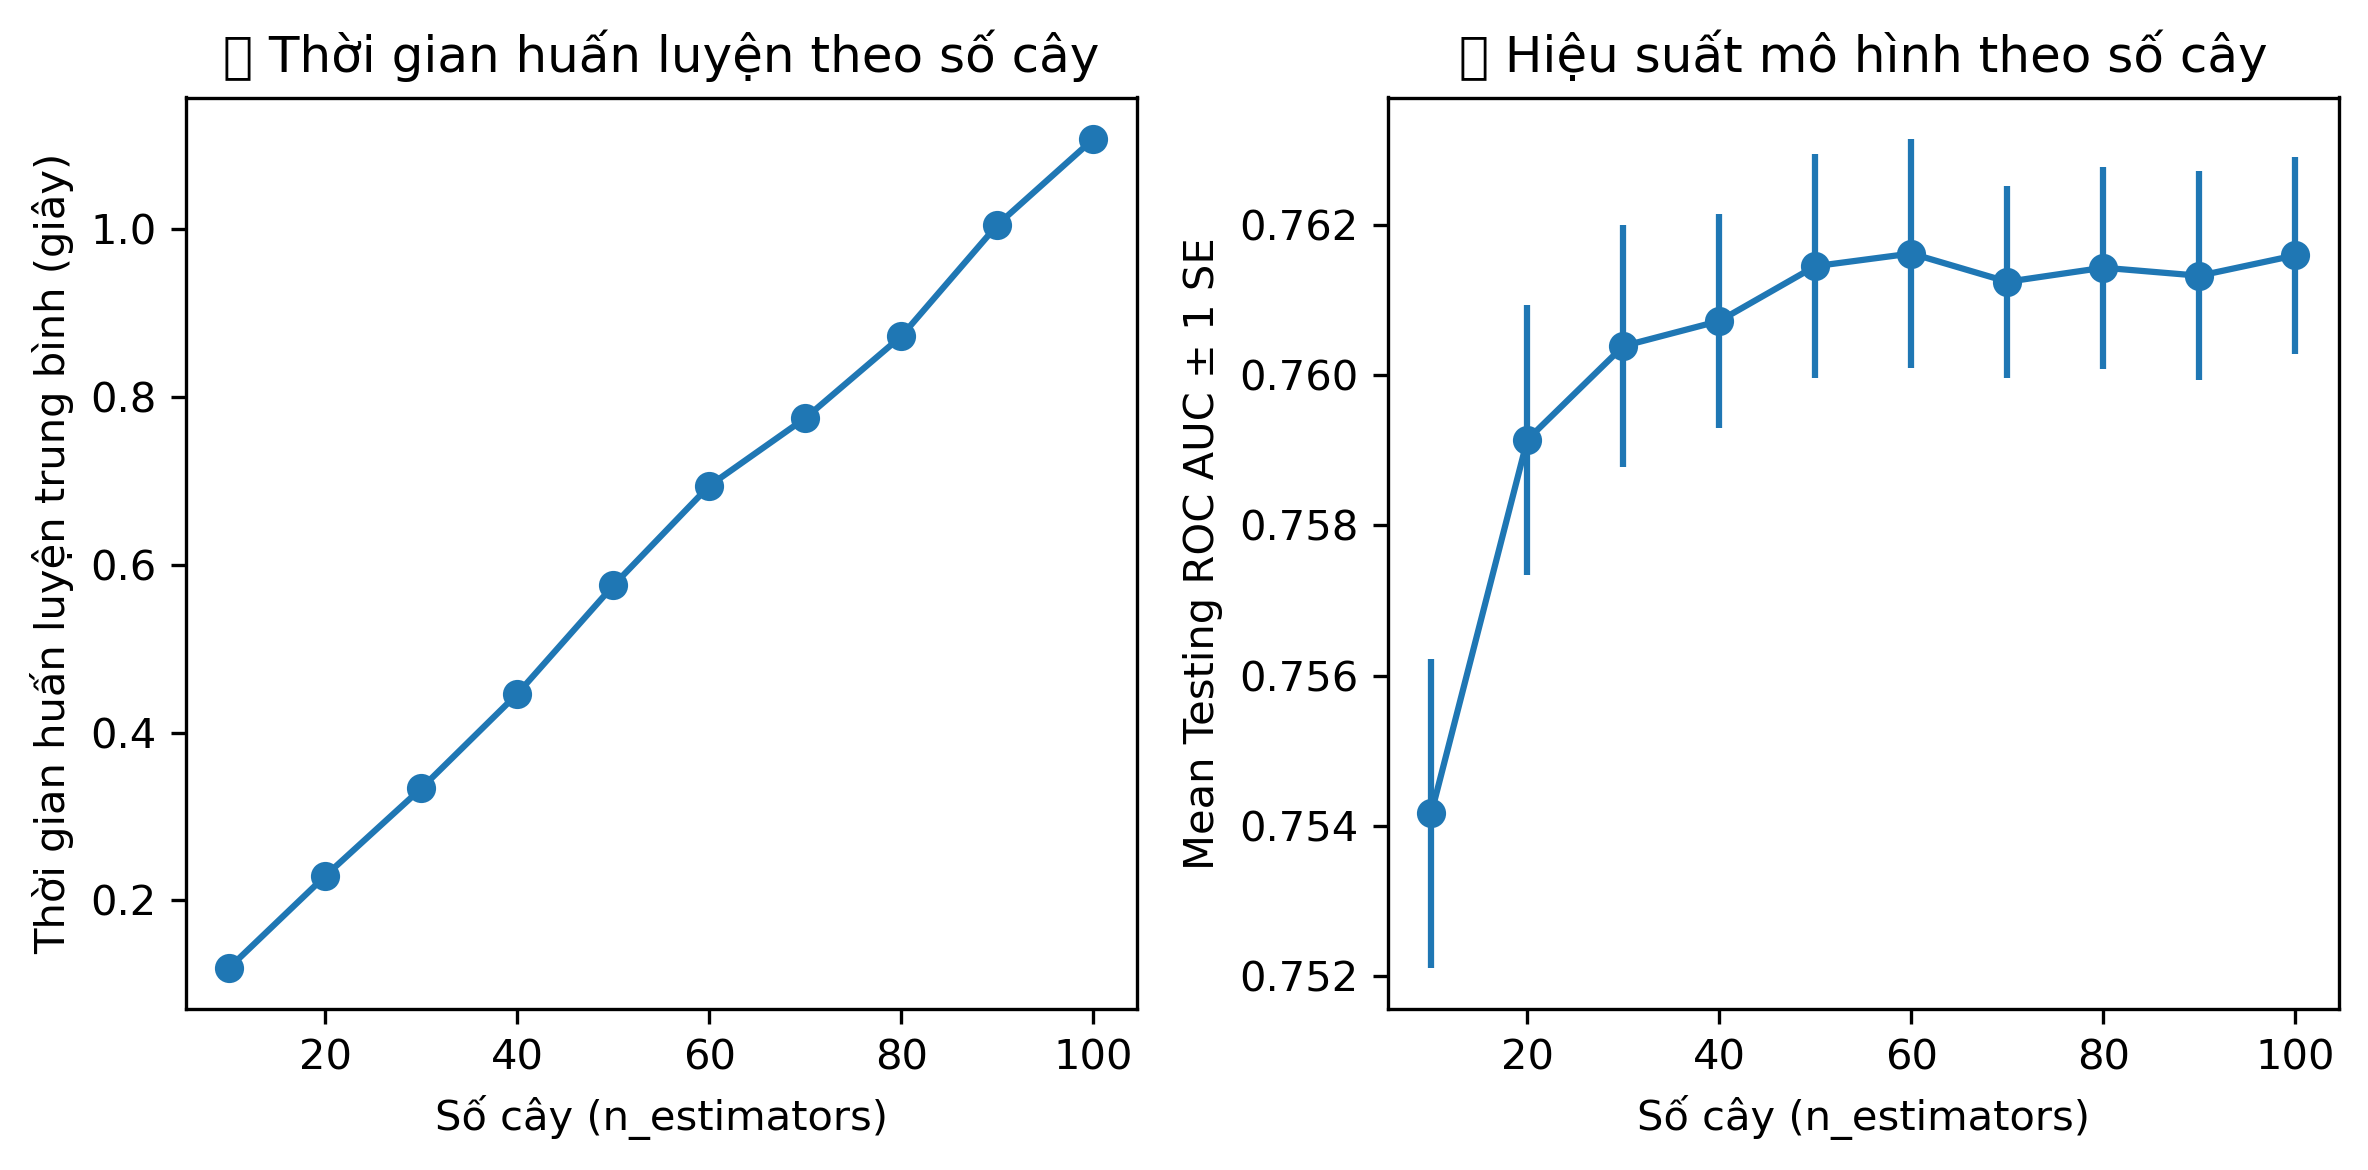

In [14]:
# PHẦN 4: VẼ BIỂU ĐỒ ĐÁNH GIÁ VÀ HIỂN THỊ FEATURE IMPORTANCE

# Chuyển kết quả tìm kiếm thành DataFrame
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

# Tạo 2 biểu đồ: (1) thời gian huấn luyện, (2) điểm ROC AUC
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Biểu đồ 1: Thời gian huấn luyện trung bình
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'], '-o')
axs[0].set_xlabel('Số cây (n_estimators)')
axs[0].set_ylabel('Thời gian huấn luyện trung bình (giây)')
axs[0].set_title('⏱ Thời gian huấn luyện theo số cây')

# Biểu đồ 2: Hiệu suất mô hình (ROC AUC)
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4), fmt='-o')
axs[1].set_xlabel('Số cây (n_estimators)')
axs[1].set_ylabel('Mean Testing ROC AUC ± 1 SE')
axs[1].set_title('🎯 Hiệu suất mô hình theo số cây')

plt.tight_layout()
plt.show()




Biểu đồ:

Trái: Thời gian huấn luyện tăng theo số cây.

Phải: Hiệu suất (ROC AUC) tăng dần, sau đó ổn định.

Khi ROC AUC không tăng đáng kể nữa → không cần thêm cây.

Giúp ta chọn cấu hình mô hình hợp lý, tránh lãng phí tài nguyên.

### 4.Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham số tốt nhất

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


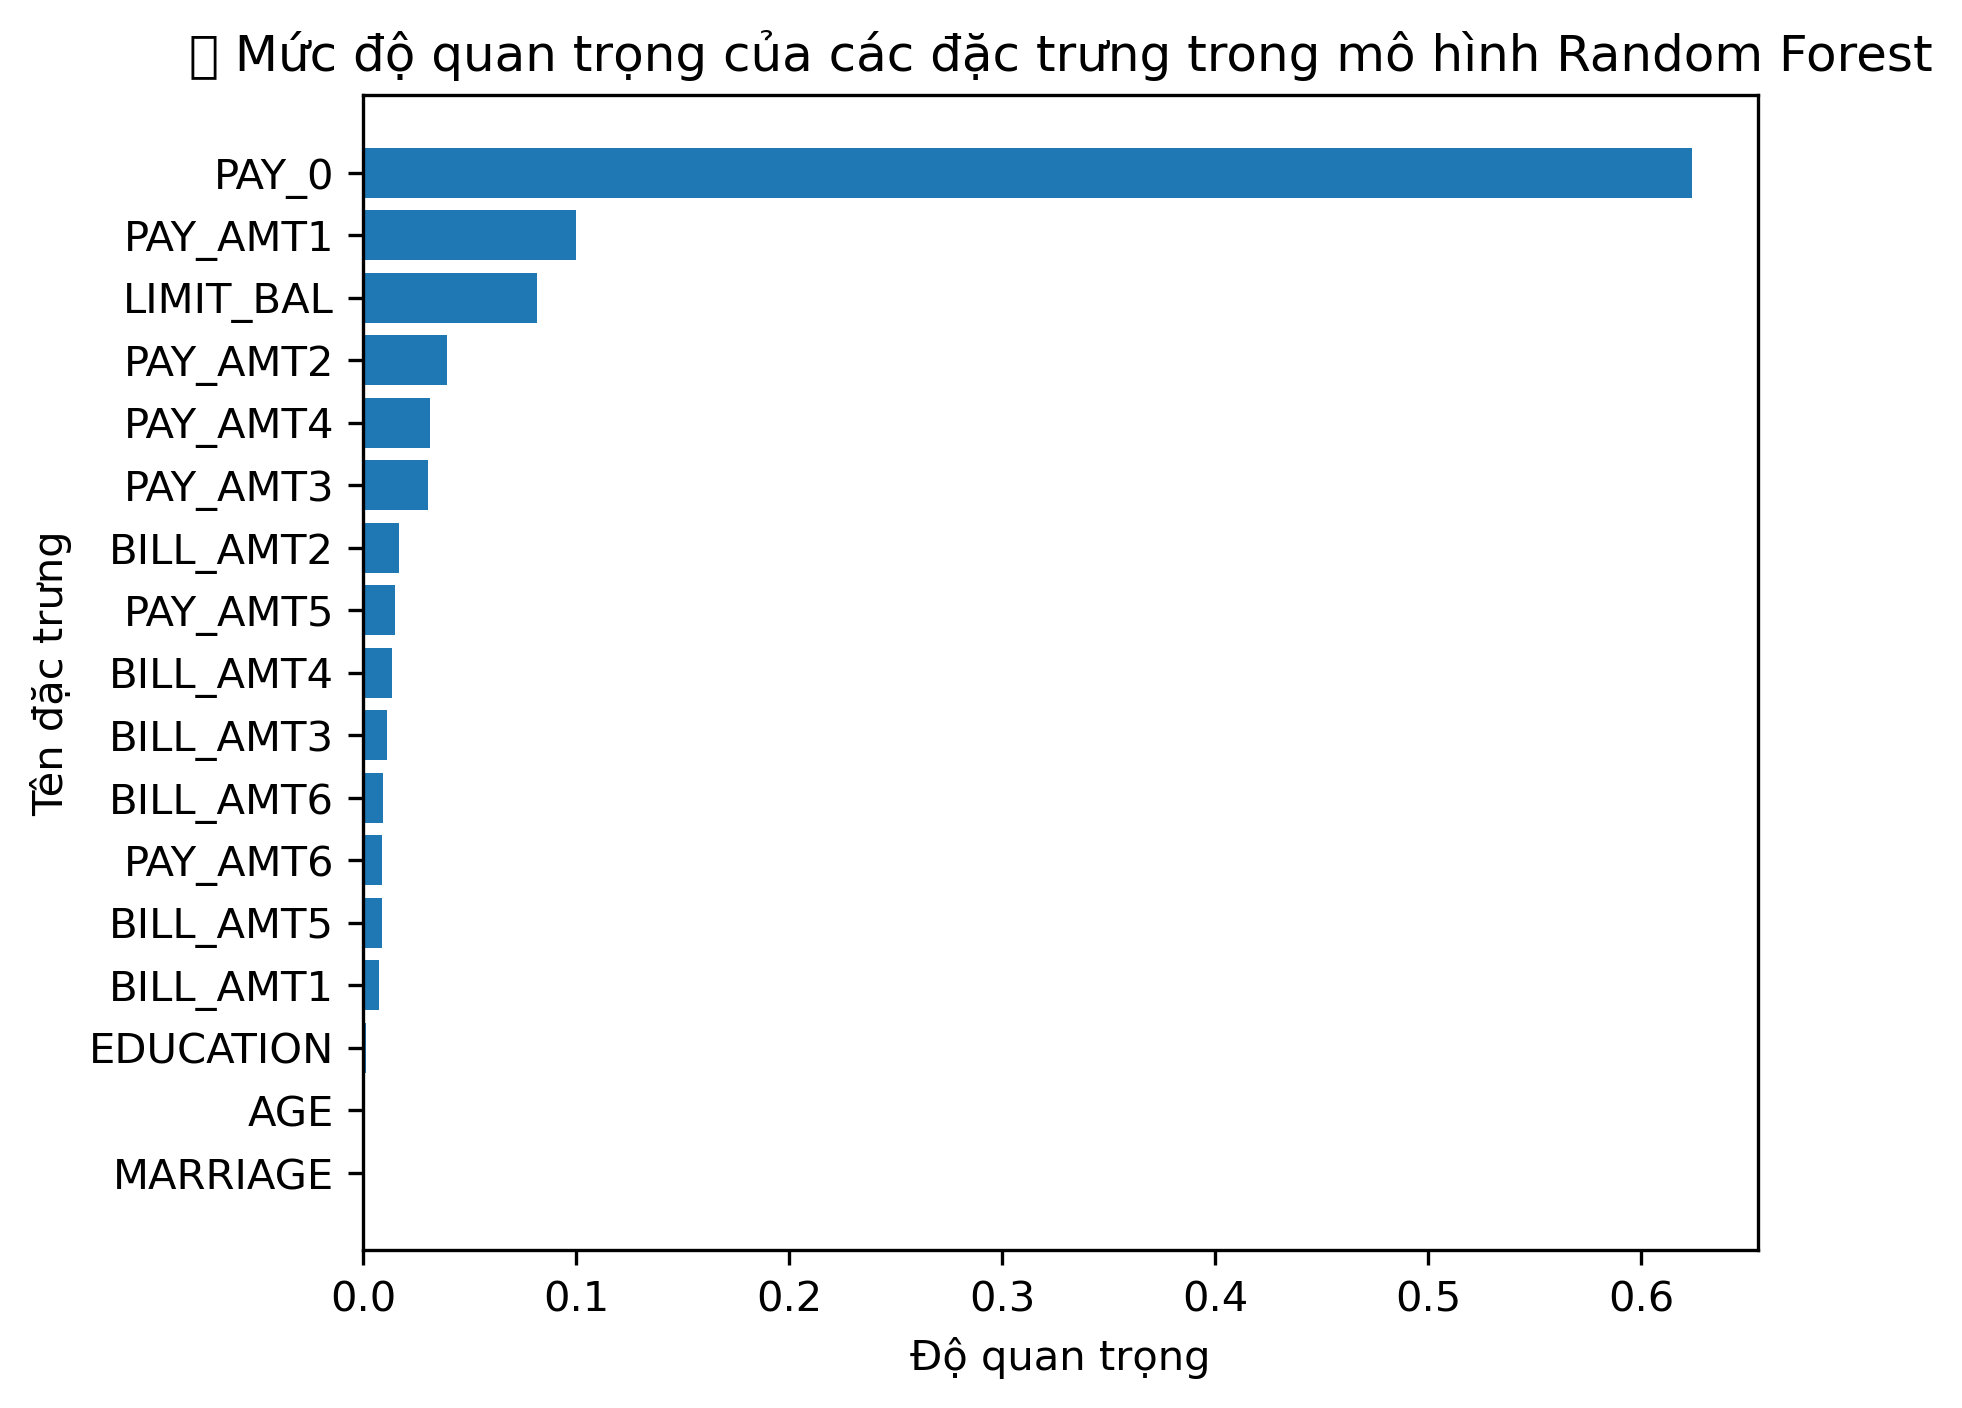

In [15]:

feat_imp_df = pd.DataFrame({
    'Feature': df[features_response[:-1]].columns,
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(6, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.title('📈 Mức độ quan trọng của các đặc trưng trong mô hình Random Forest')
plt.xlabel('Độ quan trọng')
plt.ylabel('Tên đặc trưng')
plt.show()

Biểu đồ cột hiển thị mức ảnh hưởng của từng đặc trưng đến dự đoán “vỡ nợ”.

Những đặc trưng quan trọng thường là:

PAY_1, PAY_2, BILL_AMT1, LIMIT_BAL, AGE...

Các đặc trưng này giúp mô hình nhận biết xu hướng thanh toán của khách hàng.

Hiểu được feature importance hỗ trợ việc ra quyết định kinh doanh, như đánh giá rủi ro tín dụng.?